<a href="https://colab.research.google.com/github/Harshitahegde-30/Spam-detection-Using-RNN/blob/main/Spam_detection_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
#from sklearn.model_selection import train_test_split
#from keras.layers import Dense, Embedding

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import sequence

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import RMSprop
# split data into train and test set
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics                            # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix           # Computes confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score             # Performance measure – Accuracy
from sklearn.metrics import precision_score            # Computes the precision: the ability of the classifier not to label as positive a sample that is negative
from sklearn.metrics import recall_score               # Computes the recall: the ability of the classifier to find all the positive samples
from sklearn.metrics import f1_score                   # Computes the weighted average of the precision and recall
from sklearn.metrics import classification_report

In [77]:
# Import the data set as a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/spam.csv', delimiter=',', encoding='latin-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [78]:
df.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [79]:
df.shape

(5572, 2)

**axis 0” represents rows and “axis 1” represents columns**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [81]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


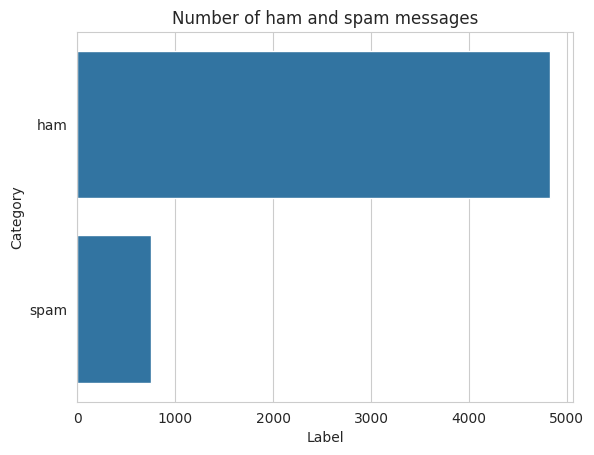

In [121]:
# Plotting
sns.countplot(df.Category)
plt.xlabel('Label')
plt.title('Number of ham and spam messages');

In [122]:
df['Category'] = df['Category'].map( {'spam': 1, 'ham': 0} )
df['Category'] = pd.to_numeric(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
X = df['Message'].values
y = df['Category'].values
df.columns = df.columns.str.strip()

In [124]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [125]:
print("Shape of df:", df.shape)
print("Columns:", df.columns)
print("First few rows:\n", df.head())
print("Length of X:", len(X))
print("Length of y:", len(y))

Shape of df: (5572, 2)
Columns: Index(['Category', 'Message'], dtype='object')
First few rows:
    Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
Length of X: 5572
Length of y: 5572


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [127]:
X_train.shape

(4457,)

In [128]:
X_test.shape

(1115,)

Text Pre-Processing

1. Tokenization

2. Text Encoding

3. Padding

In [129]:
t = Tokenizer()
t.fit_on_texts(X_train)
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:4])

[[86, 2, 172, 486, 462, 121, 33, 5, 3852, 3853, 316, 1269, 30, 2603, 67, 81, 2, 1658, 2, 317, 238], [246, 873, 15, 54, 8, 463, 160, 21, 25, 94, 1659, 76, 1, 61, 1121, 3854, 33, 174, 3, 53, 2604], [48, 58, 3855, 49, 84, 96, 98, 59, 6, 247, 98], [122, 2605, 429, 22, 39, 1446, 166, 23, 208, 4, 1122, 62, 59, 48, 28, 1, 600, 5, 1447, 2605]]


In [130]:
max_length=8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_train.shape

(4457, 8)

In [131]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()

# Model is Built with vocabulary size as the input size.
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [132]:
# fit the model
model.fit(x=padded_train, y=y_train, epochs=50, batch_size=16,
         validation_data=(padded_test, y_test), verbose=1)

Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8932 - loss: 0.2880 - val_accuracy: 0.9677 - val_loss: 0.1032
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9801 - loss: 0.0677 - val_accuracy: 0.9794 - val_loss: 0.0770
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9767 - val_loss: 0.0740
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9912 - loss: 0.0379 - val_accuracy: 0.9785 - val_loss: 0.0696
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9935 - loss: 0.0268 - val_accuracy: 0.9785 - val_loss: 0.0708
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9946 - loss: 0.0238 - val_accuracy: 0.9794 - val_loss: 0.0745
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9958 - loss: 0.0173 - val_accuracy: 0.9794 - val_loss: 0.0825
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accuracy: 

Model is trained and validated for test dataset with 50 epochs.

In [133]:
# prediction
pred = (model.predict(padded_test) > 0.5).astype("int32")
pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)


 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.84      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy   :  0.97
Precision  :  0.93
Recall     :  0.84
F1 score   :  0.88


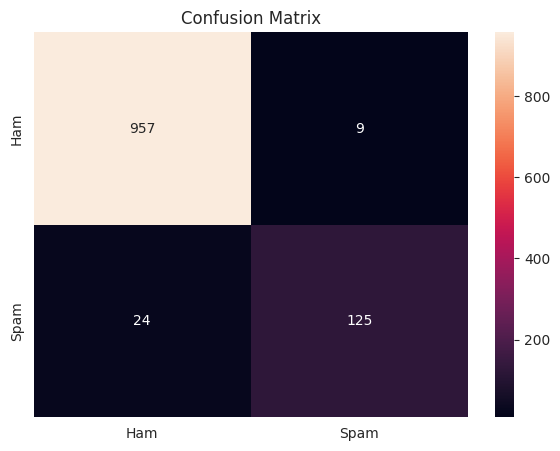

In [134]:
cm=confusion_matrix(y_test, pred,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Ham","Spam"]],
                  columns = [i for i in ["Ham","Spam"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True ,fmt='g');

# Classification Report
print('\n Classification Report : \n',metrics.classification_report(y_test, pred))
a = accuracy_score(y_test, pred)
p = precision_score(y_test, pred)
r = recall_score(y_test, pred)
f = f1_score(y_test, pred)
print("Accuracy   : ",round(a,2))
print("Precision  : ",round(p,2))
print("Recall     : ",round(r,2))
print("F1 score   : ",round(f,2))

In [135]:
# prdeiction of an new input

sms = ["hello! how are you? im visiting mom next week"]
#sms = ["You've Won! Winning an unexpected prize sounds great"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0
